# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных**

- *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
- *balcony* — число балконов
- *ceiling_height* — высота потолков (м)
- *cityCenters_nearest* — расстояние до центра города (м)
- *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
- *first_day_exposition* — дата публикации
- *floor* — этаж
- *floors_total* — всего этажей в доме
- *is_apartment* — апартаменты (булев тип)
- *kitchen_area* — площадь кухни в квадратных метрах (м²)
- *last_price* — цена на момент снятия с публикации
- *living_area* — жилая площадь в квадратных метрах (м²)
- *locality_name* — название населённого пункта
- *open_plan* — свободная планировка (булев тип)
- *parks_around3000* — число парков в радиусе 3 км
- *parks_nearest* — расстояние до ближайшего парка (м)
- *ponds_around3000* — число водоёмов в радиусе 3 км
- *ponds_nearest* — расстояние до ближайшего водоёма (м)
- *rooms* — число комнат
- *studio* — квартира-студия (булев тип)
- *total_area* — площадь квартиры в квадратных метрах (м²)
- *total_images* — число фотографий квартиры в объявлении

## Изучение данных из файла

In [881]:
# импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [882]:
# импорт csv с табулированием между значениями
data = pd.read_csv('real_estate_data.csv', sep = '\t')

# посмотрим на таблицу
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [883]:
#посмотрим информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Таблица из 23699 строк и 22 колонки. 

Таблица имеет столбцы с различными типами данных.

Ряд столбцов имеет пропуски, требующие преобработки.


## Предобработка данных

***Определите и изучите пропущенные значения***

Ключевыми в нашем исследовании, которые обязательно должны быть заполнены данными являются следующие столбцы:

- **living_area**, **kitchen_area**, **total_area**

- **last_price**

- **rooms**

- **ceiling_height**

- **floor**, **floors_total**

- **days_exposition**, **first_day_exposition**

- **cityCenters_nearest**

- **rooms**

- **locality_name**

Из перечисленных столбцов пропуски есть в следующих:

- **ceiling_height**

- **floors_total**

- **living_area**, **kitchen_area**

- **locality_name**

- **cityCenters_nearest**

- **days_exposition**

В задании указан пример замены пропусков в столбце **balcony**, поэтому сразу его реализуем.

In [884]:
#Заполним пропуски столбца balcony нулевыми значениями
data['balcony'] = data['balcony'].fillna(0)

In [885]:
# Так как столбцов много, попробуем реализовать функцию, которая будет определять долю пропусков во всем столбце.
# Если значение будет незначительным, то допустимо строки с данными пропусками исключить из датасета

def no_information(df):
    percent_nan = data[df.isnull()]['total_images'].count()/data.shape[0]*100
    return percent_nan


#Создадим список из интересующих нас столбцов, в которых есть пропуски
task_columns = ['ceiling_height',
                'floors_total',
                'living_area', 
                'kitchen_area',
                'locality_name',
                'cityCenters_nearest',
                'days_exposition'
               ]
    

In [886]:
print('Проценты пропусков в датасете')

pd.DataFrame(data[['ceiling_height',
                'floors_total',
                'living_area', 
                'kitchen_area',
                'locality_name',
                'cityCenters_nearest',
                'days_exposition'
               ]].isna().mean().round(4)*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm')

Проценты пропусков в датасете


,0
ceiling_height,38.800000
cityCenters_nearest,23.290000
days_exposition,13.420000
kitchen_area,9.610000
living_area,8.030000
floors_total,0.360000
locality_name,0.210000


In [887]:
#Определим, как коррелиурют столбцы с остальными значениями столбцов

for item in task_columns:
    for row in data.columns:
        if data[row].dtypes != object and data[item].dtypes != object:
            print(f'Корреляция столбца {item} со столбцом {row} составляет {data[item].corr(data[row]).round(3)}')
    print('_____________________________________')
    print(' ')

Корреляция столбца ceiling_height со столбцом total_images составляет -0.002
Корреляция столбца ceiling_height со столбцом last_price составляет 0.085
Корреляция столбца ceiling_height со столбцом total_area составляет 0.095
Корреляция столбца ceiling_height со столбцом rooms составляет 0.054
Корреляция столбца ceiling_height со столбцом ceiling_height составляет 1.0
Корреляция столбца ceiling_height со столбцом floors_total составляет -0.029
Корреляция столбца ceiling_height со столбцом living_area составляет 0.091
Корреляция столбца ceiling_height со столбцом floor составляет -0.012
Корреляция столбца ceiling_height со столбцом studio составляет 0.002
Корреляция столбца ceiling_height со столбцом open_plan составляет 0.043
Корреляция столбца ceiling_height со столбцом kitchen_area составляет 0.088
Корреляция столбца ceiling_height со столбцом balcony составляет 0.031
Корреляция столбца ceiling_height со столбцом airports_nearest составляет -0.024
Корреляция столбца ceiling_height со 

In [888]:
#Также полезно будет знать с чем сильно коррелирует столбец last_price
for row in data.columns:
        if data[row].dtypes != object:
            print(f'Корреляция столбца {"last_price"} со столбцом {row} составляет {data["last_price"].corr(data[row]).round(3)}')

Корреляция столбца last_price со столбцом total_images составляет 0.104
Корреляция столбца last_price со столбцом last_price составляет 1.0
Корреляция столбца last_price со столбцом total_area составляет 0.654
Корреляция столбца last_price со столбцом rooms составляет 0.363
Корреляция столбца last_price со столбцом ceiling_height составляет 0.085
Корреляция столбца last_price со столбцом floors_total составляет -0.007
Корреляция столбца last_price со столбцом living_area составляет 0.566
Корреляция столбца last_price со столбцом floor составляет 0.027
Корреляция столбца last_price со столбцом studio составляет -0.025
Корреляция столбца last_price со столбцом open_plan составляет -0.009
Корреляция столбца last_price со столбцом kitchen_area составляет 0.52
Корреляция столбца last_price со столбцом balcony составляет 0.009
Корреляция столбца last_price со столбцом airports_nearest составляет -0.026
Корреляция столбца last_price со столбцом cityCenters_nearest составляет -0.207
Корреляция

In [889]:
# Значения столбца last_price предлагаю выразить в тыс. руб.
data['last_price'] = data['last_price'] / 1000

In [890]:
# С большинством столбцов интересующих нас столбцов last_price коррелирует, поэтому разобъем столбец на 4 категории
pd.qcut(data['last_price'], 4).value_counts()

(3400.0, 4650.0]      6035
(12.189, 3400.0]      5927
(4650.0, 6800.0]      5921
(6800.0, 763000.0]    5816
Name: last_price, dtype: int64

In [891]:

def price_category(df):
    if df < 3300:
        return 'Низкая стоимость'
    elif df < 4450:
        return 'Средняя стоимость'
    elif df < 6100:
        return 'Высокая стоимость'
    else:
        return 'Очень высокая стоимость'

#добавим новый столбец price_category в наш датасет
data['price_category'] = data['last_price'].apply(price_category)

Несмотря на большой объем данных, можно заметить, что из выбранного объема датасета сильно коррелируют только площади.
Поэтому разберемся пока с ними

In [892]:
#Оценим величины total_area
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

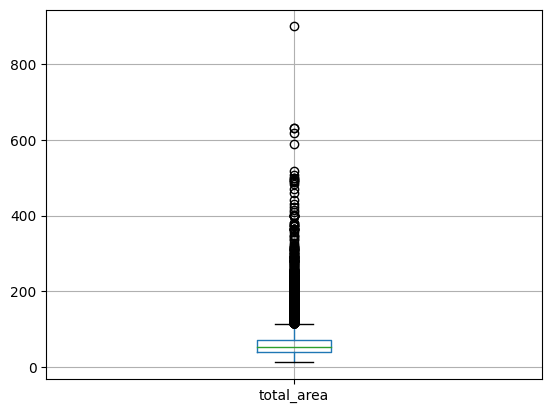

In [893]:
plt.show(data.boxplot(column = 'total_area'))

Диаграмма размаха отлично отражает картину выбросов в выборке.
Оценим их количество.
Для этого нужно оценить границы "усов" : 

- снизу значение ограничено минимальным значением 12

- сверху значение можно оценить как 1,5 межквартиля от значения 75 %, то есть

69,7 + (69,7 - 40) * 1,5 = 114,25

Узнаем, площадь скольких квартир превышает данное значение

In [894]:
print(f'Количество квартир с площадью свыше 114,25 кв м: {data[data["total_area"]>114.25]["total_images"].count()} \
или в проенцтном соотношении {"%.3f" %(data[data["total_area"]>114.25]["total_images"].count()/data.shape[0]*100)} %')

Количество квартир с площадью свыше 114,25 кв м: 1247 или в проенцтном соотношении 5.262 %


Чуть больше 5%. Это незначительно, да и заполнение таких выбросов медианными или средними значениями может сильно выделяться в плане "логики". Выбросим эти строки из датасета, а оставшиеся значения заполним медианными значениями. Оставим квартиры с площадью ниже 200 кв м (с небольшим запасом)

In [895]:
data = data[(data['total_area']<=200)].reset_index(drop = True)

In [896]:
# Проверим возможно ли ситуация, когда total_area меньше суммы kitchen_area и living area
data[data['total_area'] < (data['living_area']+data['kitchen_area'])][['living_area','kitchen_area','total_area']]

,living_area,kitchen_area,total_area
183,26.10,6.20,30.20
540,20.00,5.00,23.80
546,30.55,9.28,31.59
595,48.30,7.00,53.70
688,23.43,23.43,34.69
...,...,...,...
21619,38.00,8.60,44.00
21661,30.60,8.00,34.30
21708,62.00,32.40,91.40
21747,44.00,8.00,46.00


In [897]:
# Разделим на категории столбец total_area и заполним пропуски living_room и kitchen_room согласно по медианным значениям
pd.qcut(data['total_area'], 4).value_counts()

(11.999, 40.0]     6042
(68.925, 200.0]    5868
(51.9, 68.925]     5867
(40.0, 51.9]       5695
Name: total_area, dtype: int64

In [898]:
def area_category(df):
    if df < 39.4:
        return 'Маленькая площадь'
    elif df < 50:
        return 'Средняя площадь'
    elif df < 65.5:
        return 'Большая площадь'
    else:
        return 'Огромная площадь'

data['area_category'] = data['total_area'].apply(area_category)

data[['living_area', 'kitchen_area', 'total_area', 'area_category']].head(20)

,living_area,kitchen_area,total_area,area_category
0,51.00,25.00,108.00,Огромная площадь
1,18.60,11.00,40.40,Средняя площадь
2,34.30,8.30,56.00,Большая площадь
3,NaN,NaN,159.00,Огромная площадь
4,32.00,41.00,100.00,Огромная площадь
5,14.40,9.10,30.40,Маленькая площадь
6,10.60,14.40,37.30,Маленькая площадь
7,NaN,18.90,71.60,Огромная площадь
8,15.43,8.81,33.16,Маленькая площадь
9,43.60,6.50,61.00,Большая площадь


In [899]:
# Сделаем сводную таблицу с медианными значениями, чтобы узнать, какими значениями должны заполниться пропуски

data.pivot_table(index = ['area_category', 'locality_name'], values = ['living_area', 'kitchen_area'], aggfunc = 'median')


kitchen_area  living_area
area_category   locality_name                                        
Большая площадь Бокситогорск                        7.00        46.00
                Волосово                            8.15        30.00
                Волхов                              8.00        36.00
                Всеволожск                          9.00        31.40
                Выборг                              8.20        34.90
...                                                  ...          ...
Средняя площадь садовое товарищество Рахья          5.50        31.60
                село Никольское                     5.50        28.00
                село Павлово                        5.30        28.70
                село Путилово                       7.00        29.60
                село Русско-Высоцкое               13.15        19.55

[824 rows x 2 columns]

In [900]:
# Напишем функцию, которая будет заполнять пропуски в соответствии с категорией
def fill_nan_cells(df,column,category,function):
    df[column] = df[column].fillna(df.groupby(category)[column].transform(function))
    return df[column]

# Заполняем наши площади в соответствии с медианными значениями, высчитанными по locality_name и area_category
data['living_area'] = fill_nan_cells(data,'living_area',['area_category', 'locality_name'],'median')
data['kitchen_area'] = fill_nan_cells(data,'kitchen_area',['area_category', 'locality_name'],'median')

# Посчитаем количество пропусков, которые остались
data[['living_area', 'kitchen_area', 'total_area', 'area_category']].isna().sum()

living_area      58
kitchen_area     60
total_area        0
area_category     0
dtype: int64

In [901]:
#оставшиеся пропуски можно отбросить, так как их немного, но я предпочитаю их запоолнить медианнми значениями, 
#cгруппированными по total_area
data['living_area'] = fill_nan_cells(data,'living_area',['total_area'],'median')
data['kitchen_area'] = fill_nan_cells(data,'kitchen_area',['total_area'],'median')

# Посчитаем количество пропусков, которые остались
data[['living_area', 'kitchen_area', 'total_area', 'area_category']].isna().sum()

living_area      6
kitchen_area     2
total_area       0
area_category    0
dtype: int64

In [902]:
#Удалим оставшиеся пустые ячейки из столбцов living_area и kitchen_area
data = data[(data['kitchen_area'].isna() == False) & (data['living_area'].isna() == False)].reset_index(drop = True) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23464 entries, 0 to 23463
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23464 non-null  int64  
 1   last_price            23464 non-null  float64
 2   total_area            23464 non-null  float64
 3   first_day_exposition  23464 non-null  object 
 4   rooms                 23464 non-null  int64  
 5   ceiling_height        14357 non-null  float64
 6   floors_total          23380 non-null  float64
 7   living_area           23464 non-null  float64
 8   floor                 23464 non-null  int64  
 9   is_apartment          2755 non-null   object 
 10  studio                23464 non-null  bool   
 11  open_plan             23464 non-null  bool   
 12  kitchen_area          23464 non-null  float64
 13  balcony               23464 non-null  float64
 14  locality_name         23415 non-null  object 
 15  airports_nearest   

Функция отработала как и задумывалось. Проверим, все ли значения на месте и не получилось ли случаев, что сумма площадей **living_area** и **kitchen_area** превышают **total_area**

In [903]:
#Проверим возможна ли ситуация, когда total_area меньше суммы kitchen_area и living area
data[data['total_area'] < (data['living_area']+data['kitchen_area'])][['living_area','kitchen_area','total_area']]

,living_area,kitchen_area,total_area
183,26.10,6.20,30.20
236,20.75,8.00,28.10
348,17.00,9.50,25.00
423,88.00,13.00,98.00
439,24.75,8.00,27.11
...,...,...,...
22960,16.00,7.00,18.90
22971,63.00,13.04,67.92
23186,20.30,10.10,29.90
23344,18.00,9.60,24.80


Пропуски в этих столбцах заполнились, но встречаются случаи, когда **total_area** меньше суммы **kitchen_area** и **living_area**. Так как эта ситуация уже встречалась ранее, да и относительно датасета их количество невелико, то пока не будем делать какие-нибудь коррективы, связанные с этой особенностью.

Аналогично начнем преобработку **ceiling_height** с описания с помощью describe()

In [904]:
data['ceiling_height'].describe()

count    14357.000000
mean         2.764818
std          1.264579
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Заметно, как сильно выбиваются минимальные и максимальные значения, поэтому визуализируем выбросы с помощью диаграммы размаха

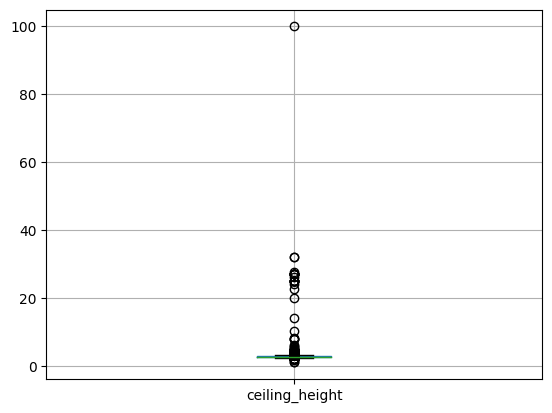

In [905]:
plt.show(data.boxplot(column = 'ceiling_height'))

Изменим диапазон для лучшей наглядности медианных значений 

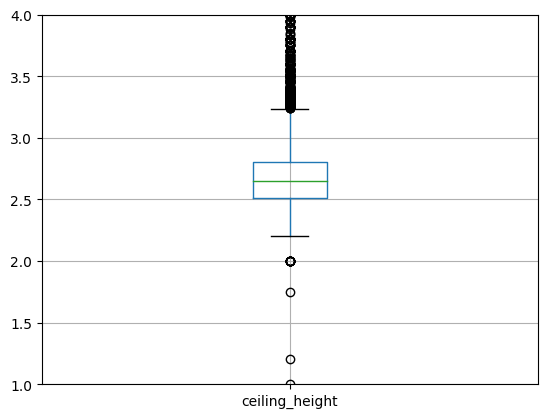

In [906]:
plt.ylim(1,4)
plt.show(data.boxplot(column = 'ceiling_height'))

Оценим количество выбросов:

- верхняя граница "усов" равна 3,175

- нижняя граница "усов" равна 2,095

Ранее мы вяснили, что столбец **ceiling_height** не коррелирует с численными столбцами. Попробуем оценить, зависит ли данный параметр от города

In [907]:
#Сделаем сводную таблицу с медианными значениями, чтобы узнать, какими значениями должны заполниться пропуски
data.pivot_table(index = 'locality_name', values = 'ceiling_height', aggfunc = 'median')

,ceiling_height
locality_name,
Бокситогорск,3.90
Волосово,2.50
Волхов,2.58
Всеволожск,2.70
Выборг,2.55
...,...
садовое товарищество Рахья,2.60
село Копорье,2.50
село Павлово,2.75


В целом значения примерно похожи. Поэтому пропуски можно заполнить и среднестатистическими параметрами (медианами).
Но я сделаю привязку к населенному пункту(категория)

In [908]:
data['ceiling_height'] = fill_nan_cells(data,'ceiling_height','locality_name','median')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23464 entries, 0 to 23463
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23464 non-null  int64  
 1   last_price            23464 non-null  float64
 2   total_area            23464 non-null  float64
 3   first_day_exposition  23464 non-null  object 
 4   rooms                 23464 non-null  int64  
 5   ceiling_height        23309 non-null  float64
 6   floors_total          23380 non-null  float64
 7   living_area           23464 non-null  float64
 8   floor                 23464 non-null  int64  
 9   is_apartment          2755 non-null   object 
 10  studio                23464 non-null  bool   
 11  open_plan             23464 non-null  bool   
 12  kitchen_area          23464 non-null  float64
 13  balcony               23464 non-null  float64
 14  locality_name         23415 non-null  object 
 15  airports_nearest   

In [909]:
# И все-таки пропуски все равно остаются. 
# Квартиры из данных населенных пунктов в единичном экземпляре и медианная величина для них неизвестна.
# Такие пропуски заполним медианным значением по столбцу

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23464 entries, 0 to 23463
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23464 non-null  int64  
 1   last_price            23464 non-null  float64
 2   total_area            23464 non-null  float64
 3   first_day_exposition  23464 non-null  object 
 4   rooms                 23464 non-null  int64  
 5   ceiling_height        23464 non-null  float64
 6   floors_total          23380 non-null  float64
 7   living_area           23464 non-null  float64
 8   floor                 23464 non-null  int64  
 9   is_apartment          2755 non-null   object 
 10  studio                23464 non-null  bool   
 11  open_plan             23464 non-null  bool   
 12  kitchen_area          23464 non-null  float64
 13  balcony               23464 non-null  float64
 14  locality_name         23415 non-null  object 
 15  airports_nearest   

Попробуем оценить пропуски столбца **cityCenters_nearest**. Попробуем 

In [910]:
list_nan = data[(data['cityCenters_nearest'].isna() == True)]['locality_name'].unique()
list_centers = data[(data['cityCenters_nearest'].isna() == False)]['locality_name'].unique() 

#Создадим список, куда будем складывать города, где есть как пропущенные, так и отсутствующие значения
gotcha = []
for city in list_nan:
    if city in list_centers:
        gotcha.append(city)
gotcha  

['поселок Мурино',
 'Санкт-Петербург',
 'посёлок Шушары',
 'посёлок Щеглово',
 'Красное Село',
 'Ломоносов',
 'Кронштадт',
 'Пушкин',
 'Колпино']

In [911]:
data['cityCenters_nearest'] = fill_nan_cells(data,'cityCenters_nearest',['locality_name', 'area_category'],'median')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23464 entries, 0 to 23463
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23464 non-null  int64  
 1   last_price            23464 non-null  float64
 2   total_area            23464 non-null  float64
 3   first_day_exposition  23464 non-null  object 
 4   rooms                 23464 non-null  int64  
 5   ceiling_height        23464 non-null  float64
 6   floors_total          23380 non-null  float64
 7   living_area           23464 non-null  float64
 8   floor                 23464 non-null  int64  
 9   is_apartment          2755 non-null   object 
 10  studio                23464 non-null  bool   
 11  open_plan             23464 non-null  bool   
 12  kitchen_area          23464 non-null  float64
 13  balcony               23464 non-null  float64
 14  locality_name         23415 non-null  object 
 15  airports_nearest   

In [912]:
data[data['cityCenters_nearest'].isna()==True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_category,area_category
5,10,2890.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,NaN,...,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Низкая стоимость,Маленькая площадь
8,20,2900.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,NaN,...,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Низкая стоимость,Маленькая площадь
12,10,3890.0,54.00,2016-06-30T00:00:00,2,2.60,5.0,30.00,5,NaN,...,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,Средняя стоимость,Большая площадь
22,20,5000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,...,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,Высокая стоимость,Большая площадь
30,12,2200.0,32.80,2018-02-19T00:00:00,1,2.56,9.0,17.75,2,NaN,...,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,Низкая стоимость,Маленькая площадь
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23448,16,2100.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,NaN,...,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Низкая стоимость,Большая площадь
23457,2,1350.0,30.00,2017-07-07T00:00:00,1,2.60,5.0,17.50,4,NaN,...,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0,Низкая стоимость,Маленькая площадь
23460,14,3100.0,59.00,2018-01-15T00:00:00,3,2.50,5.0,38.00,4,NaN,...,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Низкая стоимость,Большая площадь
23461,18,2500.0,56.70,2018-02-11T00:00:00,2,2.70,3.0,29.70,1,NaN,...,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Низкая стоимость,Большая площадь


Остались данные столбца **days_exposition**. На мой взгляд, пропуски в данном столбце пристутсвуют из-за того, что жилье здесь так и не продалось.
На мой взгляд, допустимо пропуски здесь оставить.

Проверим наличие дубликатов

In [913]:
data.duplicated().sum()

0

Повторяющиеся строки отсутсвуют, поэтому можем продолжить исследование.

В дальнейшем, ряд столбцов нам не пригодится в исследовании, поэтому упростим датасет, исключив неинтересные для нас столбцы

In [914]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_category', 'area_category'],
      dtype='object')

In [915]:
data = data[[
       'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'kitchen_area', 'locality_name', 'cityCenters_nearest',
       'days_exposition', 'price_category', 'area_category'
            ]]

In [916]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23464 entries, 0 to 23463
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23464 non-null  float64
 1   total_area            23464 non-null  float64
 2   first_day_exposition  23464 non-null  object 
 3   rooms                 23464 non-null  int64  
 4   ceiling_height        23464 non-null  float64
 5   floors_total          23380 non-null  float64
 6   living_area           23464 non-null  float64
 7   floor                 23464 non-null  int64  
 8   kitchen_area          23464 non-null  float64
 9   locality_name         23415 non-null  object 
 10  cityCenters_nearest   18057 non-null  float64
 11  days_exposition       20335 non-null  float64
 12  price_category        23464 non-null  object 
 13  area_category         23464 non-null  object 
dtypes: float64(8), int64(2), object(4)
memory usage: 2.5+ MB


***Приведите данные к нужным типам***

Некоторые данные имеют некорректный тип данных:
- **floors_total** нужно перевести в целочисленный;
- **first_day_exposition** нужно перевести во временной тип данных (в вормате даты, без учета времени, так как в дальнейшем оно нам не пригодится);


In [917]:
data = data[data['floors_total'].isna() == False]

In [918]:
data['floors_total'] = data['floors_total'].astype('Int64')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23380 entries, 0 to 23463
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23380 non-null  float64       
 1   total_area            23380 non-null  float64       
 2   first_day_exposition  23380 non-null  datetime64[ns]
 3   rooms                 23380 non-null  int64         
 4   ceiling_height        23380 non-null  float64       
 5   floors_total          23380 non-null  Int64         
 6   living_area           23380 non-null  float64       
 7   floor                 23380 non-null  int64         
 8   kitchen_area          23380 non-null  float64       
 9   locality_name         23332 non-null  object        
 10  cityCenters_nearest   17980 non-null  float64       
 11  days_exposition       20260 non-null  float64       
 12  price_category        23380 non-null  object        
 13  area_category   

В целом, предобработка готова. Часть пропсков было решено оставить, потому что заменить их согласно какой-то логике и здравому смыслу не предоставляется возможным, поэтому тип данных столбцов **cityCenters_nearest**, **days_exposition** останется вещественным.

## Расчёты и добавление результатов в таблицу

***цена квадратного метра***

In [919]:
#цену на квадратный метр  можно оценить с помощью отношения стоимости кевартиры к ее общей площади
data['price_per_area'] = (data['last_price'] / data['total_area']).round(2)
data

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_category,area_category,price_per_area
0,13000.0,108.00,2019-03-07,3,2.70,16,51.0,8,25.00,Санкт-Петербург,16028.0,NaN,Очень высокая стоимость,Огромная площадь,120.37
1,3350.0,40.40,2018-12-04,1,2.63,11,18.6,1,11.00,посёлок Шушары,18603.0,81.0,Средняя стоимость,Средняя площадь,82.92
2,5196.0,56.00,2015-08-20,2,2.70,5,34.3,4,8.30,Санкт-Петербург,13933.0,558.0,Высокая стоимость,Большая площадь,92.79
3,64900.0,159.00,2015-07-24,3,2.70,14,50.0,9,13.00,Санкт-Петербург,6800.0,424.0,Очень высокая стоимость,Огромная площадь,408.18
4,10000.0,100.00,2018-06-19,2,3.03,14,32.0,13,41.00,Санкт-Петербург,8098.0,121.0,Очень высокая стоимость,Огромная площадь,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23459,9700.0,133.81,2017-03-21,3,3.70,5,73.3,3,13.83,Санкт-Петербург,4232.0,NaN,Очень высокая стоимость,Огромная площадь,72.49
23460,3100.0,59.00,2018-01-15,3,2.50,5,38.0,4,8.50,Тосно,NaN,45.0,Низкая стоимость,Большая площадь,52.54
23461,2500.0,56.70,2018-02-11,2,2.70,3,29.7,1,8.30,село Рождествено,NaN,NaN,Низкая стоимость,Большая площадь,44.09
23462,11475.0,76.75,2017-03-28,2,3.00,17,50.0,12,23.30,Санкт-Петербург,10364.0,602.0,Очень высокая стоимость,Огромная площадь,149.51


***добавить день недели, месяц и год публикации объявления***

In [920]:
#столбцы с названиями дня, месяца и года объявления
data['weekday'] = data['first_day_exposition'].dt.day_name()
data['month'] = data['first_day_exposition'].dt.month_name()
data['year'] = data['first_day_exposition'].dt.year

***этаж квартиры; варианты — первый, последний, другой***

По условию столбец может быть разбит на три категории

In [921]:
# Создадим функцию, которая будет сравнивать этаж с общим количеством этажей и 
# присваивать одну из трех категорий в соответствии с результатом

def whatta_floor(data):
    if data['floor']==1:
        return 'первый'
    if (data['floor'] == data['floors_total']):
        return 'последний'
    return 'другой'

data['what_the_floor'] = data.apply(whatta_floor, axis = 1)

data[['what_the_floor', 'floor', 'floors_total']].head(20)


,what_the_floor,floor,floors_total
0,другой,8,16
1,первый,1,11
2,другой,4,5
3,другой,9,14
4,другой,13,14
5,другой,5,12
6,другой,6,26
7,другой,22,24
8,другой,26,27
9,другой,7,9


Задача выполнена, идем дальше

***соотношение жилой и общей площади, а также отношение площади кухни к общей***

In [922]:
data['living_ratio'] = (data['living_area'] / data['total_area']).round(3)
data['kitchen_ratio'] = (data['kitchen_area'] / data['total_area']).round(3)

data[['living_area','kitchen_area', 'total_area', 'living_ratio', 'kitchen_ratio']]

,living_area,kitchen_area,total_area,living_ratio,kitchen_ratio
0,51.0,25.00,108.00,0.472,0.231
1,18.6,11.00,40.40,0.460,0.272
2,34.3,8.30,56.00,0.612,0.148
3,50.0,13.00,159.00,0.314,0.082
4,32.0,41.00,100.00,0.320,0.410
...,...,...,...,...,...
23459,73.3,13.83,133.81,0.548,0.103
23460,38.0,8.50,59.00,0.644,0.144
23461,29.7,8.30,56.70,0.524,0.146
23462,50.0,23.30,76.75,0.651,0.304


In [923]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23380 entries, 0 to 23463
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23380 non-null  float64       
 1   total_area            23380 non-null  float64       
 2   first_day_exposition  23380 non-null  datetime64[ns]
 3   rooms                 23380 non-null  int64         
 4   ceiling_height        23380 non-null  float64       
 5   floors_total          23380 non-null  Int64         
 6   living_area           23380 non-null  float64       
 7   floor                 23380 non-null  int64         
 8   kitchen_area          23380 non-null  float64       
 9   locality_name         23332 non-null  object        
 10  cityCenters_nearest   17980 non-null  float64       
 11  days_exposition       20260 non-null  float64       
 12  price_category        23380 non-null  object        
 13  area_category   

Новые столбцы добавлены, данные собраны и подготовлены для иследования

## Исследовательский анализ данных

***Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.***

count    23380.000000
mean        58.174179
std         26.527891
min         12.000000
25%         40.000000
50%         51.800000
75%         68.900000
max        200.000000
Name: total_area, dtype: float64


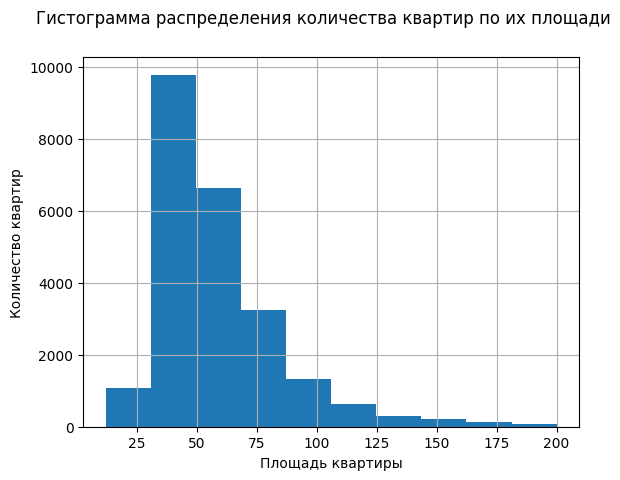

In [924]:
print(data["total_area"].describe())
data['total_area'].hist(bins = 10) 

plt.suptitle('Гистограмма распределения количества квартир по их площади')
plt.xlabel('Площадь квартиры')
plt.ylabel('Количество квартир')
plt.show()

Так как мы раннее избавились от выбросов по этому столбцу, значение range не учитывал, то есть программа уже работает с медианными значениями из всей первоначальной выборки. 

На гистограмме отчетливо видно, что основное множесто квартир имеют площадь в диапазоне  ~ 30..60 кв м. 
Самое большое количество квартир (>5000) - ~ 30..40 кв м, немного меньше (~ 4500) - 40..50  кв м. 

count     23380.000000
mean       6025.715619
std        6244.782660
min          12.190000
25%        3400.000000
50%        4600.000000
75%        6700.000000
max      330000.000000
Name: last_price, dtype: float64


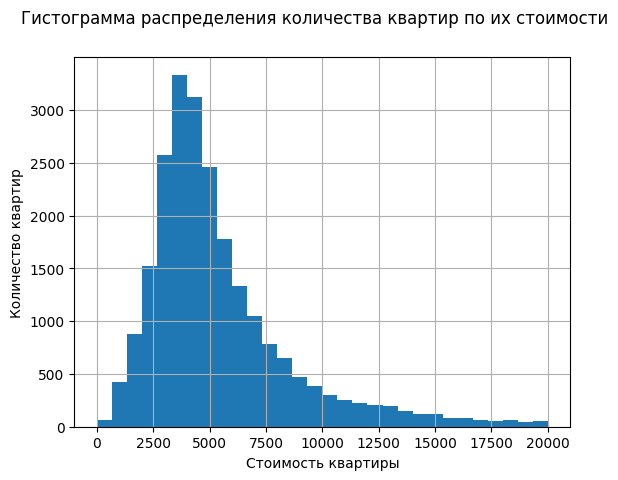

In [925]:
print(data['last_price'].describe())
data['last_price'].hist(bins = 30, range = (0, 2*10e+3))

plt.suptitle('Гистограмма распределения количества квартир по их стоимости')
plt.xlabel('Стоимость квартиры')
plt.ylabel('Количество квартир')
plt.show()

Самая частая цена на рынке жилья ~ 2,5..5 млн р. В этом диапазоне лежит ~ 10000 вариантов 

count    23380.000000
mean         2.035201
std          0.995564
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64


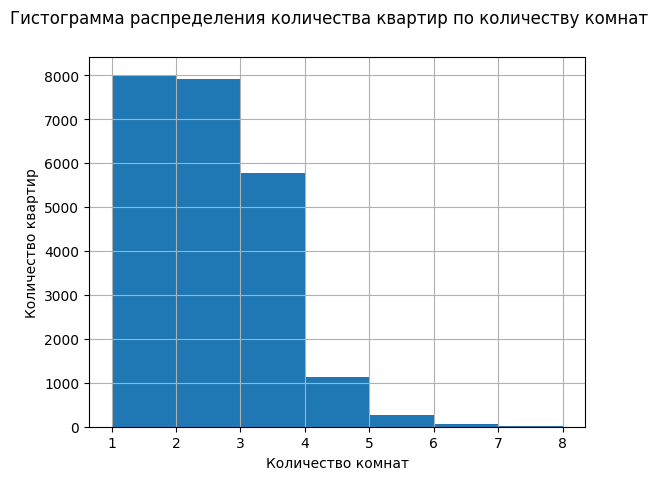

In [926]:
print(data['rooms'].describe())
data['rooms'].hist(bins=7, range=(1,8))

plt.suptitle('Гистограмма распределения количества квартир по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()


Преимущество за 1-ками и 2-ками(~ 8000) и 3-ками (~ 6000). А дальше уже очень сильная просадка, доля квартир с количеством комнат больше 4 очень мала

count    23380.000000
mean         2.729832
std          1.013853
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


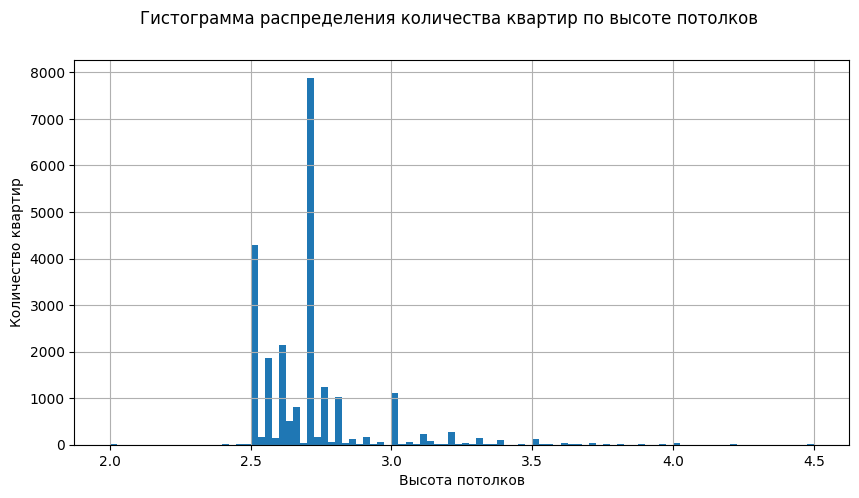

In [927]:
print(data['ceiling_height'].describe())
data['ceiling_height'].hist(bins = 100, range = (2, 4.5), figsize = (10,5))

plt.suptitle('Гистограмма распределения количества квартир по высоте потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.show()

2,65 м - наиболее встречющаяся высота потолков. Больше половины всех вариантов составляют потолки с высотой 2,5..2,7 м

***Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?***

In [928]:
data['days_exposition'].describe()

count    20260.000000
mean       179.770484
std        218.294879
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

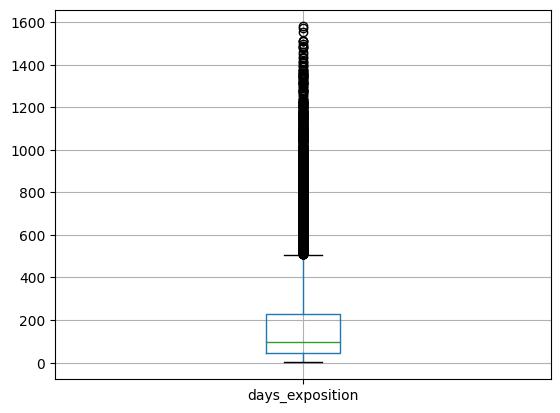

In [929]:
plt.show(data.boxplot(column = 'days_exposition'))

Отметим, что учитываются только числовые значеня в столбце

среднее - 179.77

медиана - 95

На диаграмме размаха отчетливо виден хвост выбросов после ~500.

Среднестатистически квартира продается от 45..230 дней. Соответственно, все что продалось вне этого диапазона, можно считать отклонениями от среднего (если раньше, то очень быстро, если позже - необычно долго)

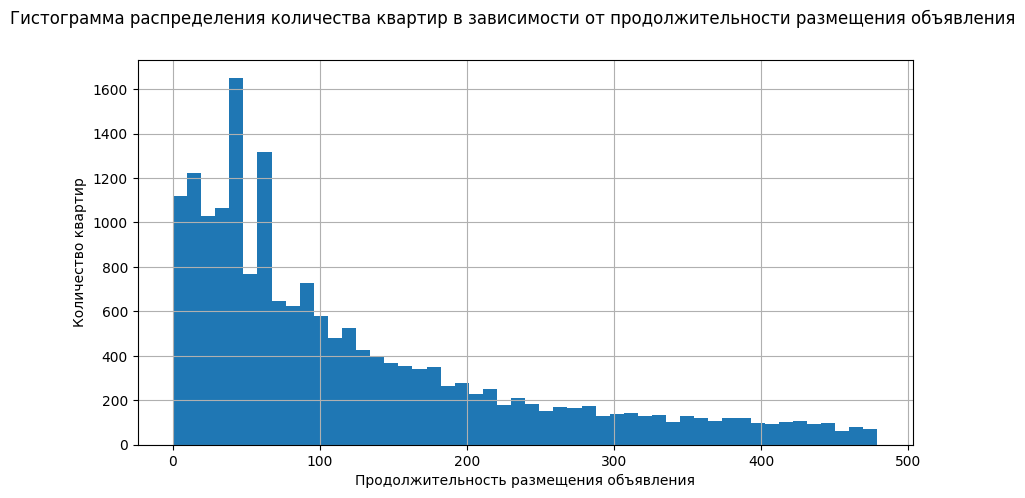

In [930]:
data['days_exposition'].hist(bins = 50, range=(0,479), figsize = (10,5))

plt.suptitle('Гистограмма распределения количества квартир в зависимости от продолжительности размещения объявления')
plt.xlabel('Продолжительность размещения объявления')
plt.ylabel('Количество квартир')
plt.show()

Ряд значений сильно выбивается из распределения. Попробуем их отсеять

В целом, конечно, нельзя исключать, что это совсем невозможно, но из-за этих значений теряется целостность нормального распределения

In [931]:
data['days_exposition'].value_counts().index

Float64Index([ 45.00000000000001,               60.0,                7.0,
                            30.0,  90.00000000000001,                4.0,
              3.0000000000000004,                5.0,               14.0,
                             9.0,
              ...
                          1081.0,             1060.0,  693.0000000000001,
                          1355.0,             1318.0, 1553.0000000000002,
                           793.0, 1434.0000000000002,             1231.0,
                           971.0],
             dtype='float64', length=1130)

Так как мы условились разбирать только реализованные проекты, создадим вспомогательную таблицу с этими значениями и присвоим ей целочисленный тип

In [932]:
days_exposition_new_table = data[data['days_exposition'].isna() == False]['days_exposition'].astype(int)
days_exposition_new_table.value_counts(ascending = False).head(10)

45    880
60    538
7     233
30    207
90    192
4     176
3     156
5     151
14    143
9     141
Name: days_exposition, dtype: int64

In [933]:
days_exposition_new_table[(days_exposition_new_table > 89)&(days_exposition_new_table < 92)]

12       90
276      90
423      90
443      90
446      90
         ..
22701    90
22829    90
22830    91
22934    91
23396    90
Name: days_exposition, Length: 261, dtype: int64

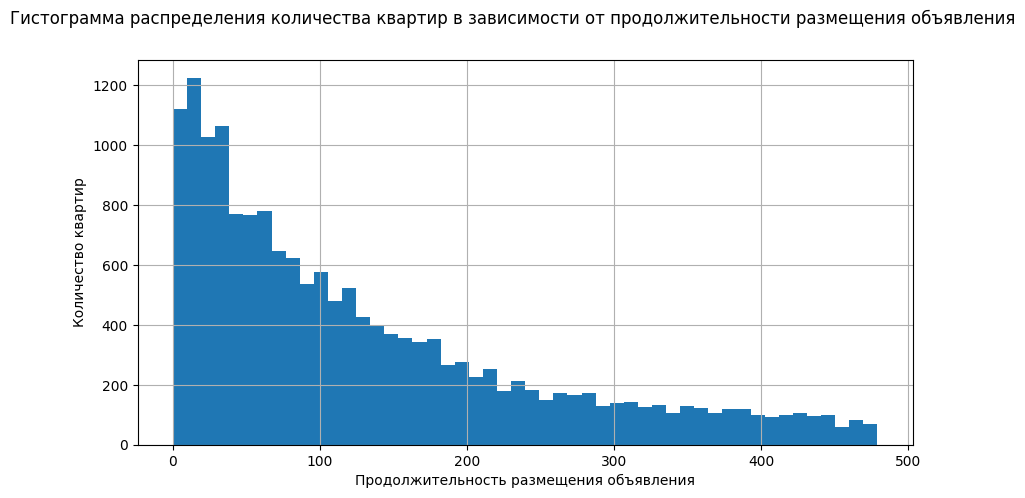

In [934]:
days_exposition_new_table = days_exposition_new_table[
    (days_exposition_new_table != 45)&(days_exposition_new_table!=60)&((days_exposition_new_table != 90))]
#Теперь к отсортированной таблице строим гистограмму

days_exposition_new_table.hist(bins = 50, range=(0,479), figsize = (10,5))

plt.suptitle('Гистограмма распределения количества квартир в зависимости от продолжительности размещения объявления')
plt.xlabel('Продолжительность размещения объявления')
plt.ylabel('Количество квартир')
plt.show()

Гистограмма стала более равномерной. График соответствует распределению Пуассона

***Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.***

Прежде отметим те столбцы, выбросы которых уже отсеяли:
    
- **total_area**

- **ceiling_height**


Также были обнаружены выбросы по столбцу **days_exposition**


Оценим выбросы в столбце **last_price**

count     23380.000000
mean       6025.715619
std        6244.782660
min          12.190000
25%        3400.000000
50%        4600.000000
75%        6700.000000
max      330000.000000
Name: last_price, dtype: float64


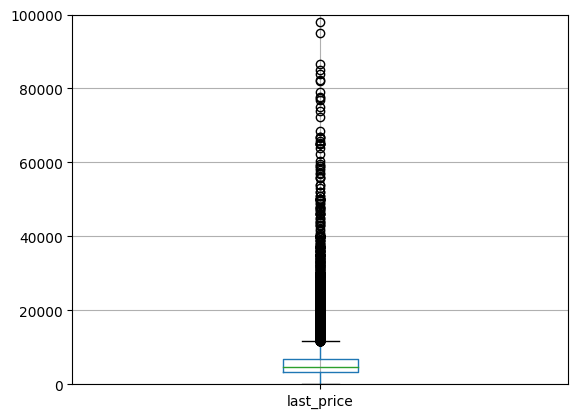

In [935]:
print(data['last_price'].describe())
data.boxplot(column = 'last_price')
plt.ylim(0,100000)
plt.show()

Найдем граничные значения усов:

- верняя 6700 + (6700-3400)*1,5 = 11650

- нижняя равна min знчению

Оценим, сколько значений входит в данный диапазон и как изменится гистограмма распределения по данному показателю

Число значений внутри диаграммы размаха 21501


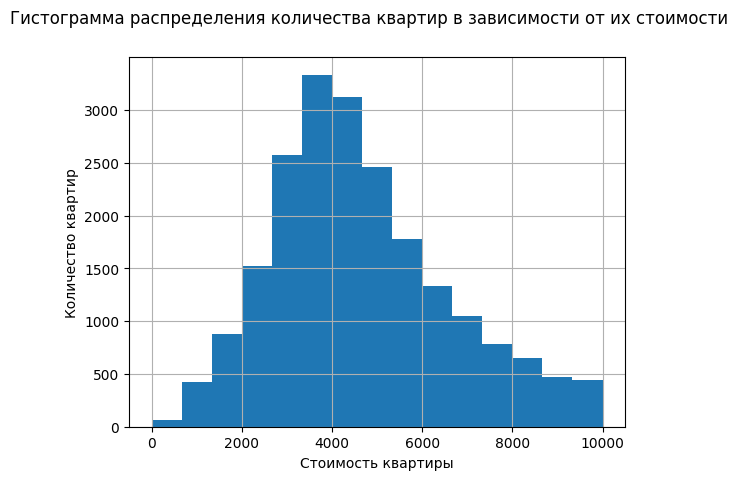

In [936]:
print(f'Число значений внутри диаграммы размаха {data[data["last_price"]<11650]["total_area"].count()}')

data[data['last_price']<11650]['last_price'].hist(bins = 15, range = (0, 1*10e+3))

plt.suptitle('Гистограмма распределения количества квартир в зависимости от их стоимости')
plt.xlabel('Стоимость квартиры')
plt.ylabel('Количество квартир')
plt.show()

In [937]:
# Отсеем выбросы по цене
data = data[data['last_price']<50000].reset_index(drop = True)

Отсеяв квартиры стоимостью выше 50000 тыс. руб. мы учтем и дорогой сегмент жилья, и в то же время не будем учитывать неприлично дорогие постройки вроде домов с собственной архитектурой

Далее изучим выбросы **rooms**

count    23324.000000
mean         2.031898
std          0.993618
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64


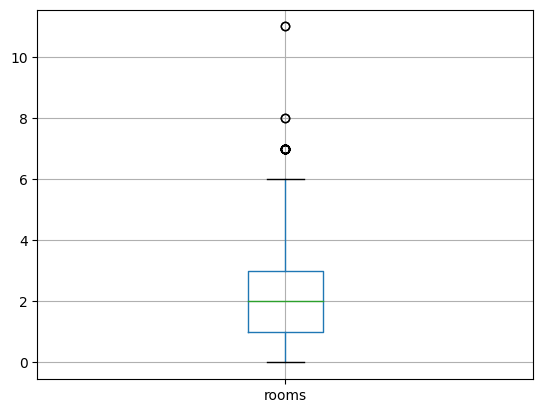

In [938]:
print(data['rooms'].describe())
data.boxplot(column = 'rooms')

plt.show()

Найдем граничные значения усов:

верняя 6

нижняя равна min знчению

Исключим 7-комнатные квартиры


Число значений внутри диаграммы размаха 23300


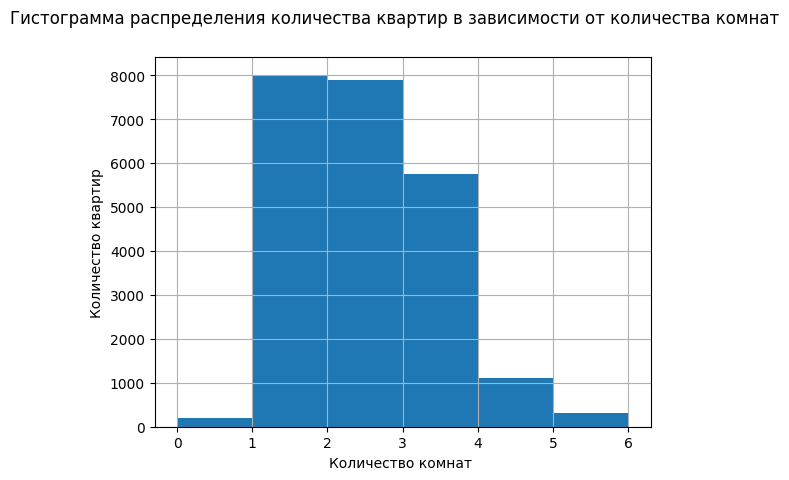

In [939]:
print(f'Число значений внутри диаграммы размаха {data[(data["rooms"]<7)]["total_area"].count()}')
data[(data["rooms"]<7)]['rooms'].hist(bins=6)
plt.suptitle('Гистограмма распределения количества квартир в зависимости от количества комнат')
plt.xlabel('Количество комнат ')
plt.ylabel('Количество квартир')
plt.show()

In [940]:
#Отсеем выбросы по количеству комнат
data = data[(data["rooms"]<7)].reset_index(drop = True)

Сложно сказать о каких-то прям координальных изменениях. Да, применительно к выбросам по времени продажи отсев помог получить более красивую визуализацию нормального распределения. 

Изначально, я подходил к проблеме пропусков путем исследования ряда параметров на выбросы. Как оказалось, большая часть строк из выбросов по площади имела пропуски, которые сложно было заполнить (ввиду отсутствия закономерности).

На данном этапе, часть данных уже была просеяна на выбросы, часть данных (типа цены) решено было оставить, так как в ряде параметров она показывала отсутствие зависимостей (следующие пункты были продуманы и реализованы ранее до получения результатов по отсеиванию, и там, как мне показалось, определенные тенденции прослеживаются) (Скорее всего задание предполагало более сложного подхода отсеивания, с использованием привязки по городам например).


***Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.***

Ранее уже проводилась проверка корреляциии значений **last_price** от других столбцов. 

Повторим еще раз

In [941]:
for row in data.columns:
        if data[row].dtypes == int or data[row].dtypes == float:
            print(f'Корреляция столбца {"last_price"} со столбцом {row} составляет {data["last_price"].corr(data[row]).round(3)}')

Корреляция столбца last_price со столбцом last_price составляет 1.0
Корреляция столбца last_price со столбцом total_area составляет 0.766
Корреляция столбца last_price со столбцом rooms составляет 0.464
Корреляция столбца last_price со столбцом ceiling_height составляет 0.087
Корреляция столбца last_price со столбцом living_area составляет 0.64
Корреляция столбца last_price со столбцом floor составляет 0.065
Корреляция столбца last_price со столбцом kitchen_area составляет 0.581
Корреляция столбца last_price со столбцом cityCenters_nearest составляет -0.334
Корреляция столбца last_price со столбцом days_exposition составляет 0.126
Корреляция столбца last_price со столбцом price_per_area составляет 0.722
Корреляция столбца last_price со столбцом year составляет -0.041
Корреляция столбца last_price со столбцом living_ratio составляет -0.032
Корреляция столбца last_price со столбцом kitchen_ratio составляет -0.127


Сильная корреляция цены квартиры с ее площадью, с удаленностью от центра города имеется обратная зависимость.  От числа комнат также прямая зависимость. Представим эти зависимости графически.

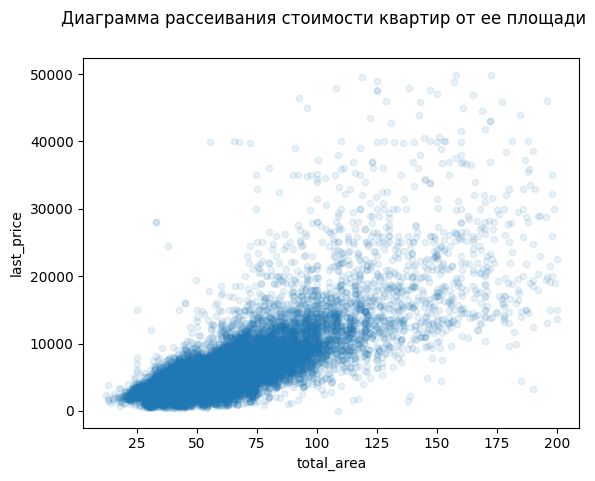

In [942]:
data.plot(y = 'last_price', x = 'total_area', kind = 'scatter', alpha = 0.1)

plt.suptitle('Диаграмма рассеивания стоимости квартир от ее площади')
plt.show()

Какой ярко выраженный разброс значений диапозоне 0..20000 тыс. руб. Изменим пределы графика

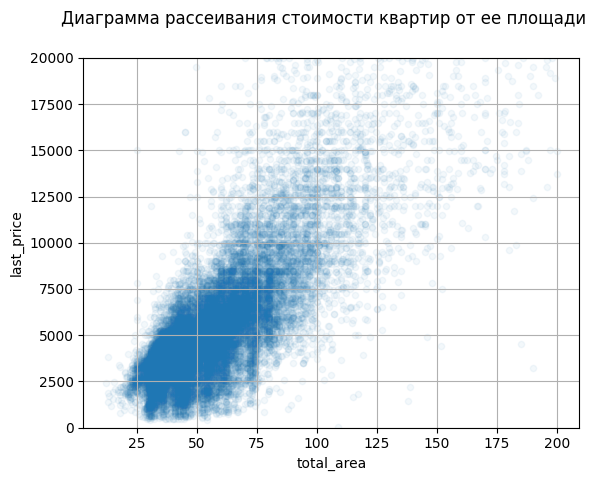

In [943]:
data.plot(y = 'last_price', x = 'total_area', kind = 'scatter', alpha = 0.05, ylim =(0, 20000), grid = True)

plt.suptitle('Диаграмма рассеивания стоимости квартир от ее площади')
plt.show()

Заметна тенденция, что с увеличением площади, увеличивается и цена квартиры. Изменяя прозрачность точек разброса, можно изучить изменение "кучности" в тех или иных диапазонах. Как и следовало ожидать с увеличением площади и стоимости квартир, их количество уменьшается.
В нащем случае, основная масса квартир сосредоточена в диапазонах цены 0..7500 и соответствующих площадях 30..80

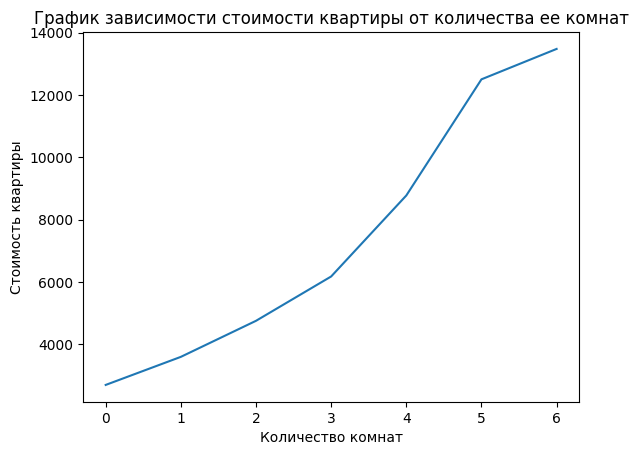

In [944]:
data.groupby('rooms')['last_price'].median().plot()
plt.title('График зависимости стоимости квартиры от количества ее комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость квартиры')
plt.show()

График зависимости указывает на то, что с ростом количества комнат увеличивается и стоимость квартиры

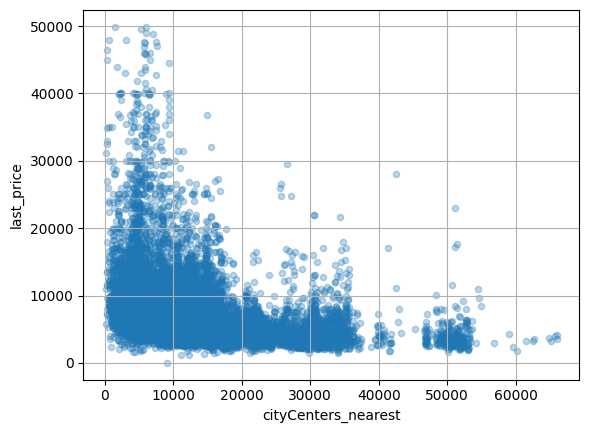

In [945]:
data.plot(y = 'last_price', x = 'cityCenters_nearest', kind = 'scatter', alpha = 0.3,  grid = True)
plt.show()

Все правильно, с приближением к центру, то есть меньшие значения столбца **cityCenters_nearest** имеют высокую цену.

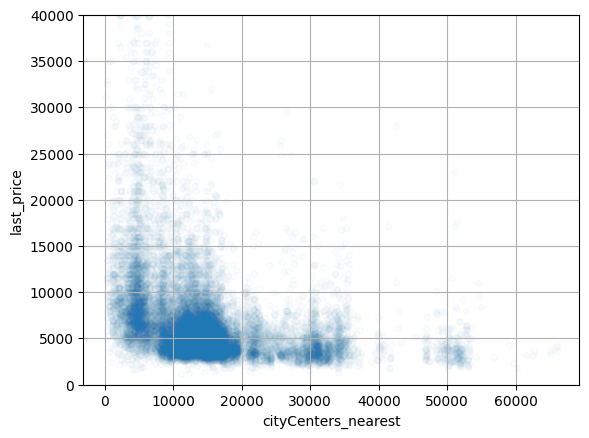

In [946]:
data.plot(y = 'last_price', x = 'cityCenters_nearest', kind = 'scatter', alpha = 0.02, grid = True, ylim = (0, 40000))
plt.show()

2 график показательный, так как при таком маленьком значении прозрачности отчетливо видны объекты в диапазоне 10-20 км, что говорит нам о том, что большое количество квартир из данных находятся там

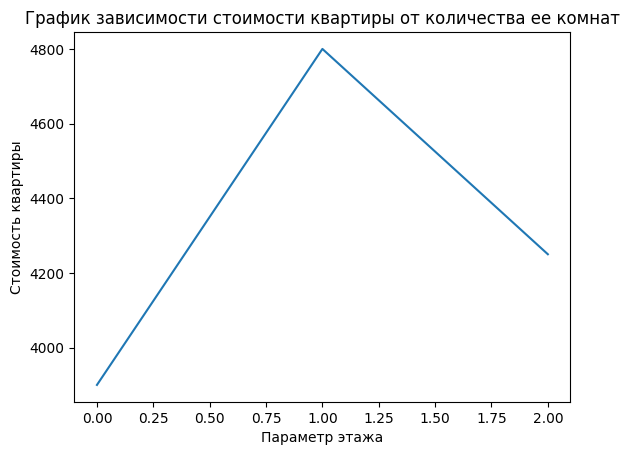

In [947]:
# Для изучения зависимости цены от категории нахождения квартиры в доме, 
# необходимо присвоить цифровые значения этим категориям
def whatta_floor_rate(df):
    if df=='первый':
        return 0
    elif df == 'последний':
        return 2
    else:
        return 1

data['what_the_floor_rate'] = data['what_the_floor'].apply(whatta_floor_rate).astype(int)

# покажем зависимость цены от категории расположения квартиры в доме
# data.plot(y = 'last_price', x = 'what_the_floor_rate', kind = 'scatter', alpha = 0.05, ylim= (0,40000))

data.groupby('what_the_floor_rate')['last_price'].median().plot()

plt.title('График зависимости стоимости квартиры от количества ее комнат')
plt.xlabel('Параметр этажа')
plt.ylabel('Стоимость квартиры')
plt.show()

Отчетливо видно, что дорогие квартиры находятся точно не на первом и не на последнем этажах

In [948]:
data

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,...,price_category,area_category,price_per_area,weekday,month,year,what_the_floor,living_ratio,kitchen_ratio,what_the_floor_rate
0,13000.0,108.00,2019-03-07,3,2.70,16,51.0,8,25.00,Санкт-Петербург,...,Очень высокая стоимость,Огромная площадь,120.37,Thursday,March,2019,другой,0.472,0.231,1
1,3350.0,40.40,2018-12-04,1,2.63,11,18.6,1,11.00,посёлок Шушары,...,Средняя стоимость,Средняя площадь,82.92,Tuesday,December,2018,первый,0.460,0.272,0
2,5196.0,56.00,2015-08-20,2,2.70,5,34.3,4,8.30,Санкт-Петербург,...,Высокая стоимость,Большая площадь,92.79,Thursday,August,2015,другой,0.612,0.148,1
3,10000.0,100.00,2018-06-19,2,3.03,14,32.0,13,41.00,Санкт-Петербург,...,Очень высокая стоимость,Огромная площадь,100.00,Tuesday,June,2018,другой,0.320,0.410,1
4,2890.0,30.40,2018-09-10,1,2.60,12,14.4,5,9.10,городской посёлок Янино-1,...,Низкая стоимость,Маленькая площадь,95.07,Monday,September,2018,другой,0.474,0.299,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23295,9700.0,133.81,2017-03-21,3,3.70,5,73.3,3,13.83,Санкт-Петербург,...,Очень высокая стоимость,Огромная площадь,72.49,Tuesday,March,2017,другой,0.548,0.103,1
23296,3100.0,59.00,2018-01-15,3,2.50,5,38.0,4,8.50,Тосно,...,Низкая стоимость,Большая площадь,52.54,Monday,January,2018,другой,0.644,0.144,1
23297,2500.0,56.70,2018-02-11,2,2.70,3,29.7,1,8.30,село Рождествено,...,Низкая стоимость,Большая площадь,44.09,Sunday,February,2018,первый,0.524,0.146,0
23298,11475.0,76.75,2017-03-28,2,3.00,17,50.0,12,23.30,Санкт-Петербург,...,Очень высокая стоимость,Огромная площадь,149.51,Tuesday,March,2017,другой,0.651,0.304,1


In [949]:
data.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['count', 'describe'])

count describe                                                 \
          last_price      25%     50%      75%   count      max         mean   
weekday                                                                        
Friday          3936   3400.0  4550.0  6599.00  3936.0  48763.0  5701.136895   
Monday          3561   3450.0  4600.0  6600.00  3561.0  49900.0  5893.207838   
Saturday        1895   3300.0  4500.0  6500.00  1895.0  49900.0  5637.043857   
Sunday          1671   3370.0  4500.0  6425.00  1671.0  40000.0  5674.210417   
Thursday        4208   3400.0  4600.0  6800.00  4208.0  48000.0  5979.988016   
Tuesday         4131   3400.0  4700.0  6700.00  4131.0  49500.0  5893.170645   
Wednesday       3898   3400.0  4650.0  6736.25  3898.0  48000.0  5892.254117   

                                
              min          std  
weekday                         
Friday     450.00  4207.035225  
Monday     430.00  4655.130956  
Saturday   550.00  4541.579884  
Sunday     470.00  4438.400537  
Thursday   450.00  4823.074811  
Tuesday    430.00  4635.779185  
Wednesday   12.19  4487.093219

Сводная таблица численно и отражает факты, но ее сложно интерпретировать. 

Сделаем аналогичное преобразование, что и в прошлом пункте: присвоим каждому дню недели число и построим диаграмму разброса

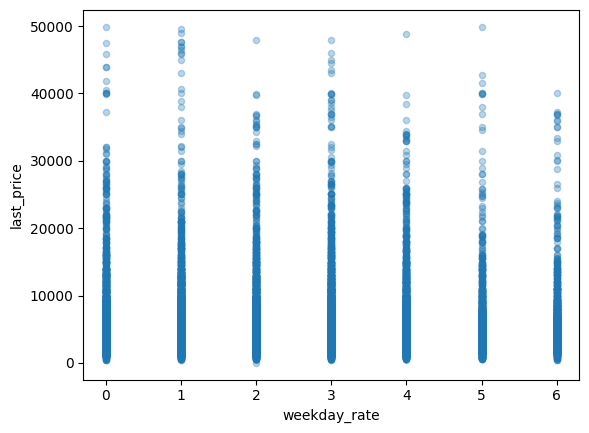

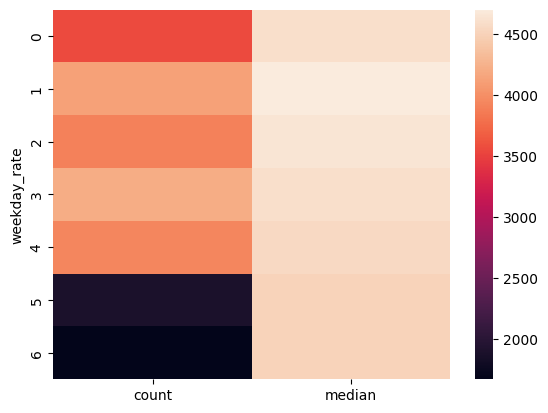

In [950]:
data['weekday_rate'] = data['first_day_exposition'].dt.weekday

#покажем зависимость цены от дня в неделе
data.plot(y = 'last_price', x = 'weekday_rate', kind = 'scatter', alpha = 0.3)
plt.show()
sns.heatmap(data.pivot_table(index='weekday_rate', values = 'last_price',aggfunc = ('count','median')))
plt.show()

Сопоставляя график и результаты в сводной таблице, можно сделать вывод, что в целом для большинства квартир для каждого дня значения цены варьируются в одном ценовом диапазоне (значение прозрачности очень маленькая). Больше всего выделяются цены квартир, объявления которых выставлены в среду или четверг. 

В выходные дни количество объявлений почти в два раз меньше, чем в будние дни.

Аналогично изучим зависимости цены по месяцам и годам

count describe                                        \
          last_price      25%      50%       75%   count        max   
month                                                                 
April           2332   3500.0  4752.47  6800.000  2332.0  48763.000   
August          1723   3400.0  4550.00  6607.500  1723.0  43511.000   
December        1607   3350.0  4650.00  6761.381  1607.0  46424.072   
February        2606   3350.0  4600.00  6628.750  2606.0  48000.000   
January         1473   3370.0  4600.00  6700.000  1473.0  49500.000   
July            1661   3440.0  4600.00  6700.000  1661.0  49900.000   
June            1729   3280.0  4390.00  6450.000  1729.0  47700.000   
March           2547   3400.0  4600.00  6500.000  2547.0  43000.000   
May             1248   3400.0  4500.00  6650.000  1248.0  40000.000   
November        2337   3490.0  4650.00  6700.000  2337.0  49900.000   
October         2089   3500.0  4550.00  6500.000  2089.0  45000.000   
September       1948   3450.0  4650.00  6850.000  1948.0  43000.000   

                                             
                  mean     min          std  
month                                        
April      5842.560828  430.00  4245.042007  
August     5862.712686  450.00  4642.313890  
December   5882.819814  490.00  4703.042335  
February   5895.936832  450.00  4825.994501  
January    5928.178430  480.00  4844.374077  
July       5822.468135  440.00  4497.870198  
June       5688.699637  430.00  4822.858089  
March      5725.436472   12.19  4241.343356  
May        5824.577284  490.00  4575.142185  
November   5991.421357  560.00  4883.057389  
October    5707.284694  600.00  4188.211812  
September  5906.340045  520.00  4305.737638

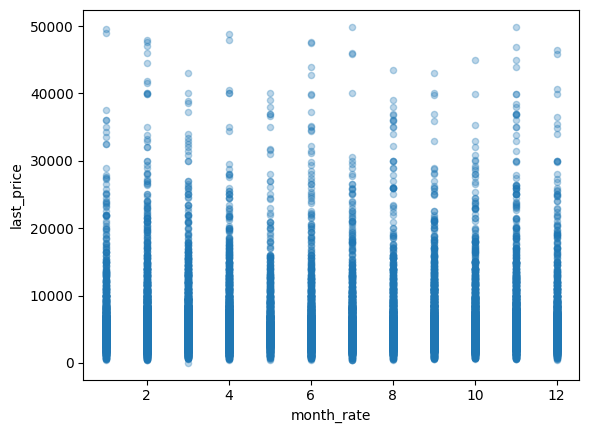

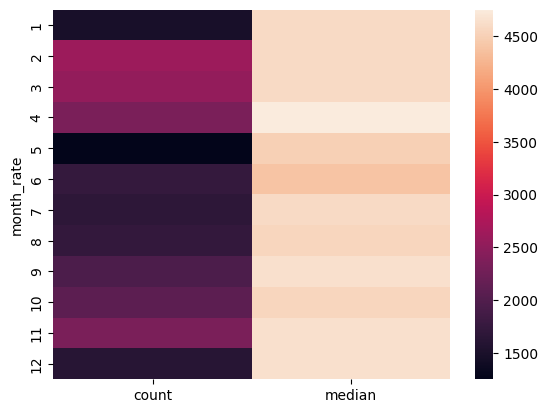

In [951]:
display(data.pivot_table(index = 'month', values = 'last_price', aggfunc = ['count', 'describe']))

data['month_rate'] = data['first_day_exposition'].dt.month

#покажем зависимость цены от месяца
data.plot(y = 'last_price', x = 'month_rate', kind = 'scatter', alpha = 0.3)
plt.show()
sns.heatmap(data.pivot_table(index='month_rate', values = 'last_price',aggfunc = ('count','median')))
plt.show()

В зависимости от месяца объявления, большое количество дорогих квартир выставлено в июне и августе.

Большое количество объявлений было выставлено в апреле, марте, ноябре и феврале (>2000).

count describe                                                    \
     last_price      25%     50%      75%   count        max          mean   
year                                                                         
2014        133   4400.0  7500.0  13800.0   133.0  46424.072  10552.334195   
2015       1143   3700.0  5200.0   7592.5  1143.0  43000.000   6768.515850   
2016       2719   3398.5  4500.0   6690.0  2719.0  49500.000   5909.861616   
2017       8051   3340.0  4500.0   6500.0  8051.0  49900.000   5747.168491   
2018       8421   3350.0  4550.0   6480.0  8421.0  48000.000   5606.143536   
2019       2833   3700.0  5000.0   7100.0  2833.0  49000.000   6133.815621   

                            
          min          std  
year                        
2014  1200.00  8665.097055  
2015   650.00  5271.994780  
2016   490.00  4916.512228  
2017   450.00  4556.651314  
2018   430.00  4176.380527  
2019    12.19  4528.159538

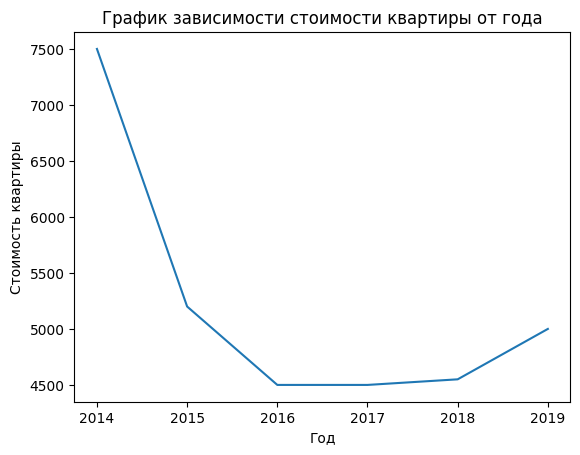

In [952]:
display(data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['count', 'describe']))
#покажем зависимость цены от года
data.groupby('year')['last_price'].median().plot()
plt.title('График зависимости стоимости квартиры от года')
plt.xlabel('Год')
plt.ylabel('Стоимость квартиры')
plt.show()

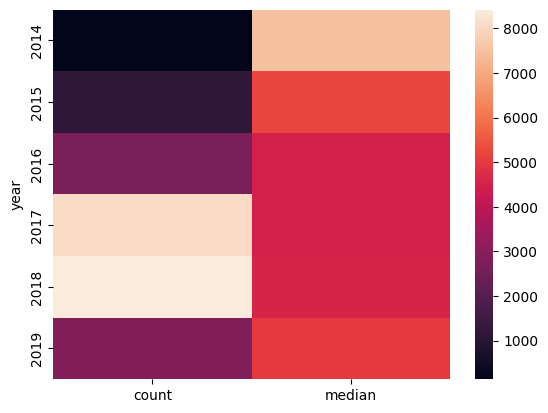

In [953]:
sns.heatmap(data.pivot_table(index='year', values = 'last_price',aggfunc = ('count','median')))
plt.show()

В среднем стоимость квартир в 2014 году была максимальной (при этом наблюдалось очень маленьке количество предложений). Рассеяние значение стоимости квартир - максимально (стандартное отклонение)

Основной бум предложений произошел в 2017 и 2018 годах. Два года подряд - в 2016 и в 2017 наблюдался активный рост количества объявлений (~ в 3 раза).С ростом предложений уменьшалась дисперсия относитлеьно медианной цены.

В 2019 наблюдается снижение количества предложений и вместе с ними, снижается количество квартир, однако дисперсия цен не изменилась

если говорить про медианное значение, то тут можно было дать заключение как по таблице, так и по графику
    
с 2014 по 2016 наблюдается снижение медианной цены квартир, после наблюдается восходщий тренд
Можно даже это попытаться объяснить. В 2014 году был кризис. Учетную ставку тогда повысили очень сильно, чтобы сдержать инфляцию. Выше ставка -> дороже кредиты/ипотеки -> меньшее количество людей могут себе это позволить -> дешевле жилье. Ну, в теории это работает так. Что происходило на самом деле, что за квартиры у нас в выборке, этого мы не знаем.


***Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.***

In [954]:
# Создаем сводную таблицу с индексом locality_name и значениями first_day_exposition и price_per_area
top_cities = data.pivot_table(index = 'locality_name', values = ['first_day_exposition', 'price_per_area'], aggfunc = ['count', 'mean'])

# Переименуем  столбцы
top_cities.columns = ['count', 'count2', 'price_per_area']

# Выделим нужные для нас, отсортируем их в порядке убывания, отсеяв таким образом нужное число нужных нам городов
top_cities = top_cities[['count', 'price_per_area']].sort_values(by='count', ascending = False).round(3).head(10)

display(top_cities)

print(f'Город с высокой стоимостью квадратного метра квартиры из выбранного списка: \
{top_cities[top_cities["price_per_area"] == top_cities["price_per_area"].max()].index[0]} \
с ценой за квадратный метр {top_cities[top_cities["price_per_area"] == top_cities["price_per_area"].max()].values[0][1]}')

print(f'Город с низкой стоимостью квадратного метра квартиры из выбранного списка: \
{top_cities[top_cities["price_per_area"] == top_cities["price_per_area"].min()].index[0]} \
с ценой за квадратный метр {top_cities[top_cities["price_per_area"] == top_cities["price_per_area"].min()].values[0][1]}')

/var/folders/wd/gl0hh07s1f73kj7kynty4z6r0000gn/T/ipykernel_10597/812824994.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  top_cities = data.pivot_table(index = 'locality_name', values = ['first_day_exposition', 'price_per_area'], aggfunc = ['count', 'mean'])


,count,price_per_area
locality_name,,
Санкт-Петербург,15359,112.159
посёлок Мурино,520,85.673
посёлок Шушары,439,78.552
Всеволожск,398,68.654
Пушкин,364,103.123
Колпино,337,75.333
посёлок Парголово,326,90.333
Гатчина,307,68.746
деревня Кудрово,299,92.474


Город с высокой стоимостью квадратного метра квартиры из выбранного списка: Санкт-Петербург с ценой за квадратный метр 112.159
Город с низкой стоимостью квадратного метра квартиры из выбранного списка: Выборг с ценой за квадратный метр 58.142


***Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.***

In [955]:
#Сделаем выборку только по Санкт-Петербургу
spb_flats = data.query('locality_name == "Санкт-Петербург"')

#Создадим столбец сityCenters_nearest_km, отражающий расстояние до центра города в км
spb_flats['cityCenters_nearest_km'] = (spb_flats['cityCenters_nearest'] / 1000).round(0)

#Создадим сводную таблицу для расчета средних цен, отнесенных к каждому км.
spb_flats_pivot = spb_flats.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = ['mean', 'median'])
spb_flats_pivot.columns = ['mean', 'median']

/var/folders/wd/gl0hh07s1f73kj7kynty4z6r0000gn/T/ipykernel_10597/3919077805.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_flats['cityCenters_nearest_km'] = (spb_flats['cityCenters_nearest'] / 1000).round(0)


In [956]:
spb_flats_pivot.reset_index(inplace=True)
spb_flats_pivot

,cityCenters_nearest_km,mean,median
0,0.0,18699.125143,13500.000
1,1.0,12120.467450,10000.000
2,2.0,11813.133094,9500.000
3,3.0,9961.451505,8270.000
4,4.0,10675.754804,8900.000
5,5.0,11125.625314,8950.000
6,6.0,11080.557239,8342.500
7,7.0,11070.721335,7300.000
8,8.0,8928.063305,7350.000
9,9.0,7486.798586,5500.000


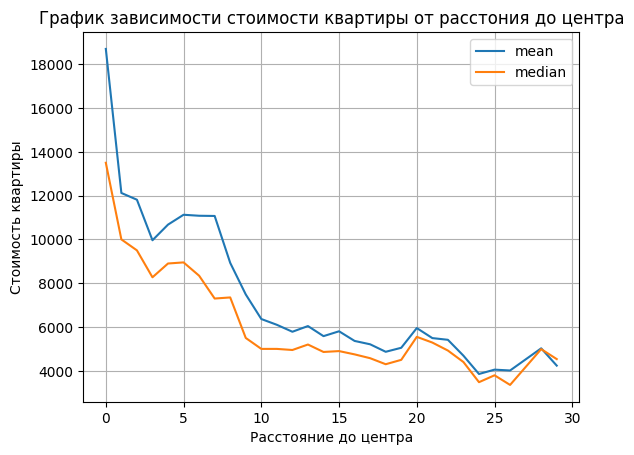

cityCenters_nearest_km    1.000000
mean                     -0.805682
median                   -0.739419
Name: cityCenters_nearest_km, dtype: float64


In [957]:
# По резльтатам сводной таблицы построим график средней зависимости цены на км от расстояния до центра в км
spb_flats_pivot[spb_flats_pivot.index !=27][['mean', 'median']].plot(grid = True)
plt.title('График зависимости стоимости квартиры от расстония до центра')
plt.xlabel('Расстояние до центра')
plt.ylabel('Стоимость квартиры')
plt.show()
# Расчитаем коээфициент Пирсона 
print(spb_flats_pivot.corr()['cityCenters_nearest_km'])

В принципе, график отражает суть - стоимость квартир падает по мере удаления от центра.
На это же указывает отрицательный коэффициент Пирсона

Очень сильное изменение средней цены - это 1-й км от центра.

Но если смотреть по медианной, то достаточно сильное изменение в цене происходит - 8 - 9 км от центра города.

(Резкий скачок на 27 км - "выброс", единственная квартира с высокой ценой на данном расстоянии)

***Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?***

In [958]:
# Отсортируем предложения квартир, находящиеся в центре (центр - территория до 3 км от центра)
spb_flats = spb_flats[spb_flats['cityCenters_nearest_km'] < 3]

Далее проведем исследование так же, как и делали ранее для всего датасета.

count    468.000000
mean      88.270556
std       34.726211
min       12.000000
25%       64.000000
50%       83.000000
75%      109.175000
max      200.000000
Name: total_area, dtype: float64


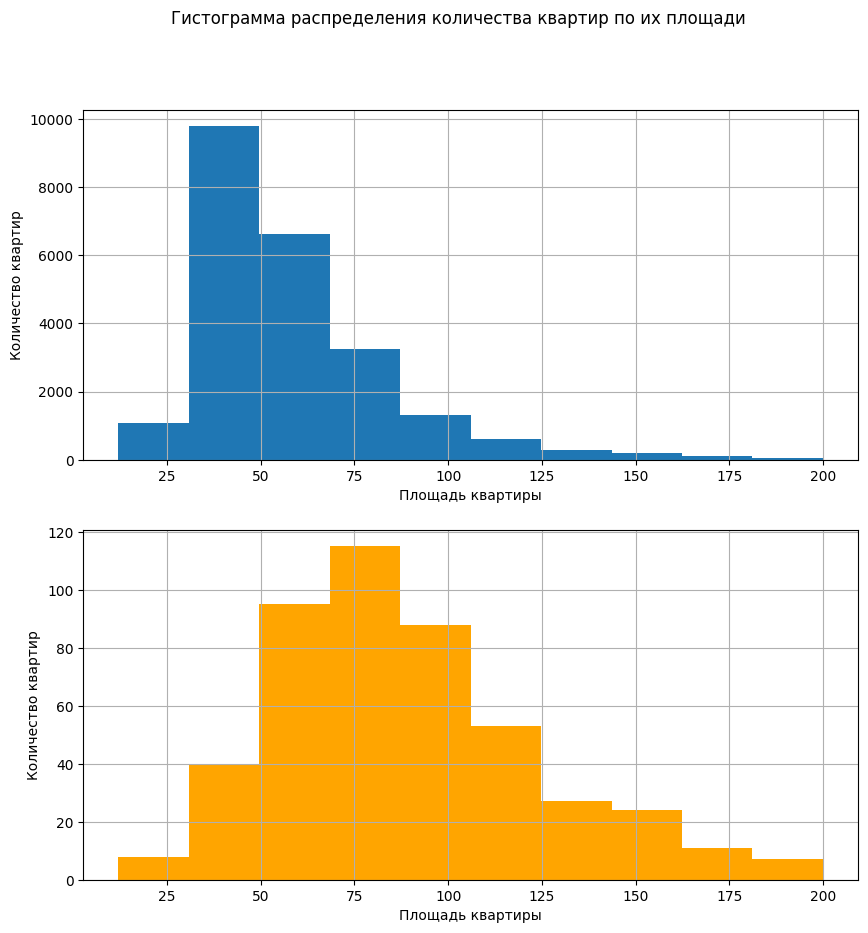

In [959]:
print(spb_flats['total_area'].describe())

plt.subplot(2,1,1)
data['total_area'].hist(bins = 10, figsize = (10,10)) 
plt.suptitle('Гистограмма распределения количества квартир по их площади')
plt.xlabel('Площадь квартиры')
plt.ylabel('Количество квартир')


plt.subplot(2,1,2)
spb_flats['total_area'].hist(bins = 10, color = 'orange')   

plt.xlabel('Площадь квартиры')
plt.ylabel('Количество квартир')

plt.show()


count      468.000000
mean     12233.101767
std       7613.688564
min       2100.000000
25%       7637.500000
50%       9875.000000
75%      14012.500000
max      49900.000000
Name: last_price, dtype: float64


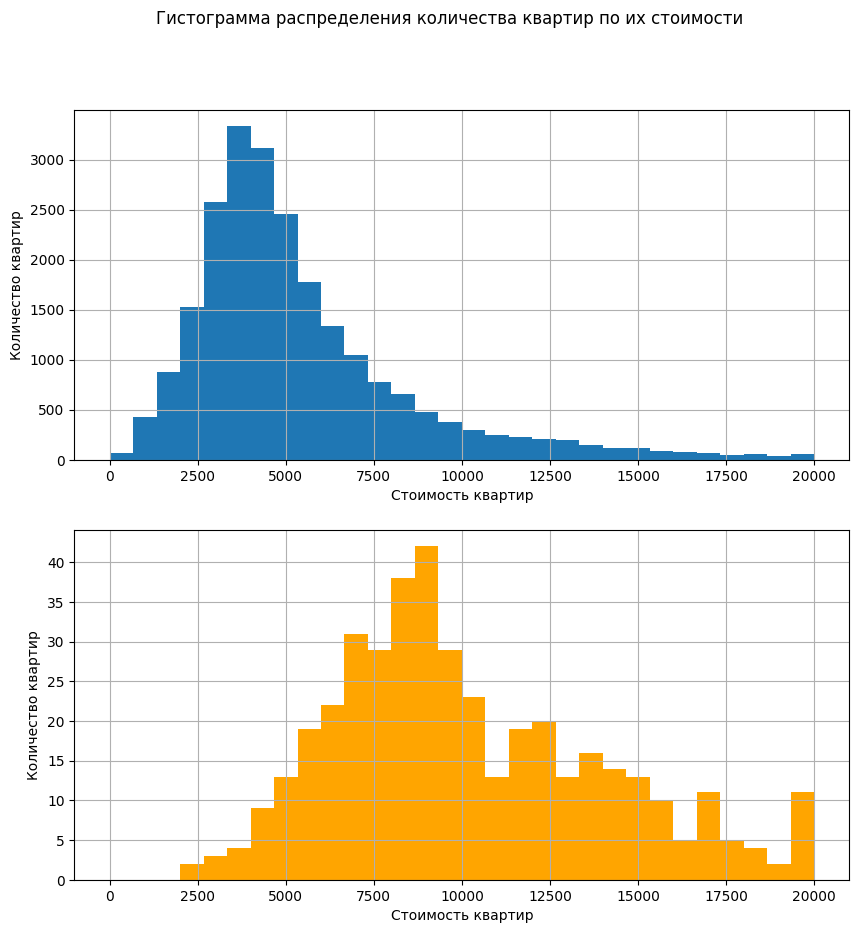

In [960]:
print(spb_flats['last_price'].describe())

plt.subplot(2,1,1)
data['last_price'].hist(bins = 30, range = (0, 2*10e+3), figsize = (10,10))
plt.suptitle('Гистограмма распределения количества квартир по их стоимости')
plt.xlabel('Стоимость квартир')
plt.ylabel('Количество квартир')

plt.subplot(2,1,2)
spb_flats['last_price'].hist(bins = 30, range = (0, 2*10e+3), color ='orange')

plt.xlabel('Стоимость квартир')
plt.ylabel('Количество квартир')
plt.show()

count    468.000000
mean       2.920940
std        1.157856
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        6.000000
Name: rooms, dtype: float64


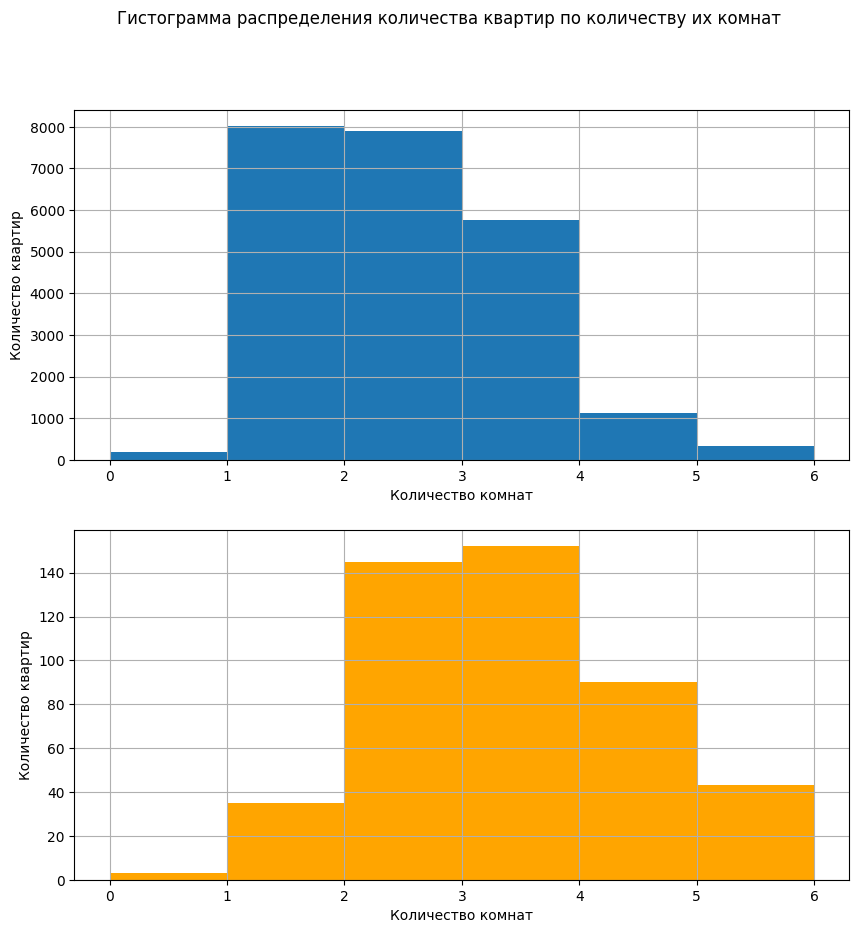

In [961]:
print(spb_flats['rooms'].describe())

plt.subplot(2,1,1)
data['rooms'].hist(bins=6, figsize = (10,10))
plt.suptitle('Гистограмма распределения количества квартир по количеству их комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')

plt.subplot(2,1,2)
spb_flats['rooms'].hist(bins=6, color = 'orange')

plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')

plt.show()

count    468.000000
mean       3.069615
std        0.416419
min        2.500000
25%        2.700000
50%        3.000000
75%        3.340000
max        5.800000
Name: ceiling_height, dtype: float64


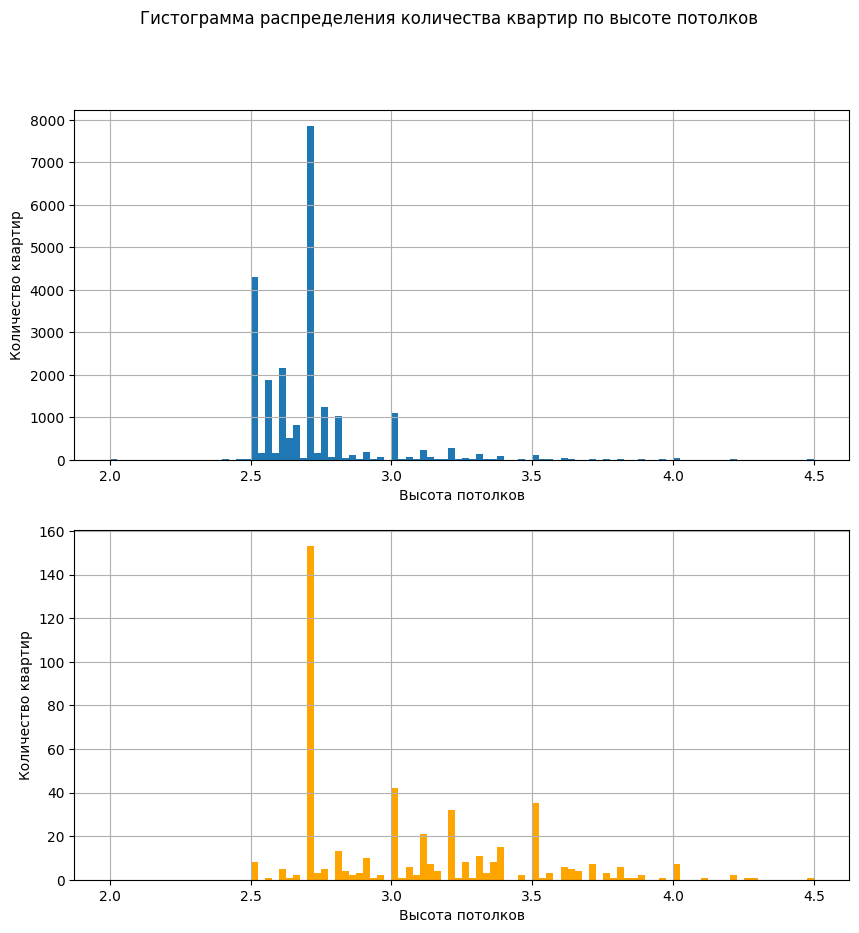

In [962]:
print(spb_flats['ceiling_height'].describe())

plt.subplot(2,1,1)
data['ceiling_height'].hist(bins = 100, range = (2, 4.5), figsize = (10,10))

plt.suptitle('Гистограмма распределения количества квартир по высоте потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')

plt.subplot(2,1,2)
spb_flats['ceiling_height'].hist(bins = 100, range = (2, 4.5), color = 'orange')

plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')

plt.show()

В целом, распределение квартир СПб повторяет распределение квартир в общем:

- **total_area** большая часть квартир находится в диапазоне 50..100 кв м (против 30..60 кв м по всему датасету)

- **last_price** максимум смещен вправо, так как стоимость квартиры в СПб (особенно в центре) выше средней цены по датасету. 

- **rooms** в центральной части Санкт-Петербурга преимущественно выставлялись предложения по 2-х и 3-х комнатным квартирам

- **ceiling_height** в центре города большая доля квартир, имеющие потолки выше стандартных 2,7 м  

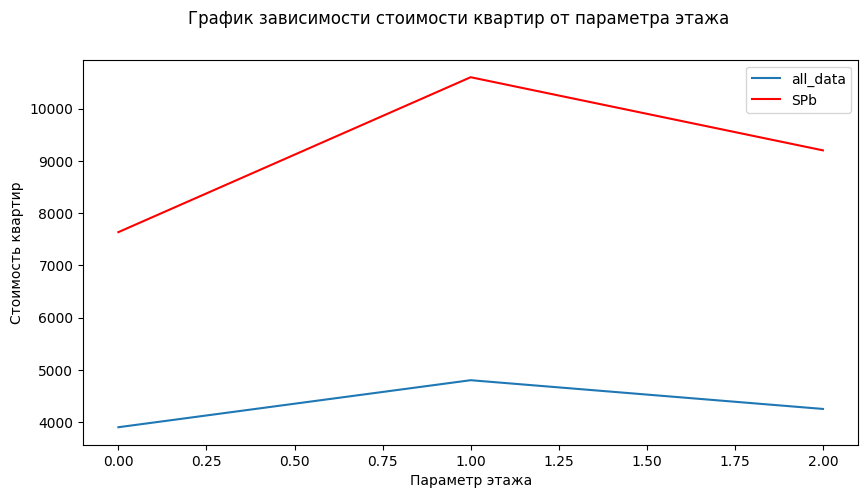

In [963]:
plt.subplots(1,1, figsize = (10,5))

ax1 = data.pivot_table(index = 'what_the_floor_rate', values = 'last_price', aggfunc = 'median')
plt.plot(ax1.index, ax1.values, label = 'all_data' )

ax2 = spb_flats.pivot_table(index = 'what_the_floor_rate', values = 'last_price', aggfunc = 'median')
plt.plot(ax2.index, ax2.values , color='Red', label ='SPb')

plt.suptitle('График зависимости стоимости квартир от параметра этажа')
plt.xlabel('Параметр этажа')
plt.ylabel('Стоимость квартир')
plt.legend()
plt.show()

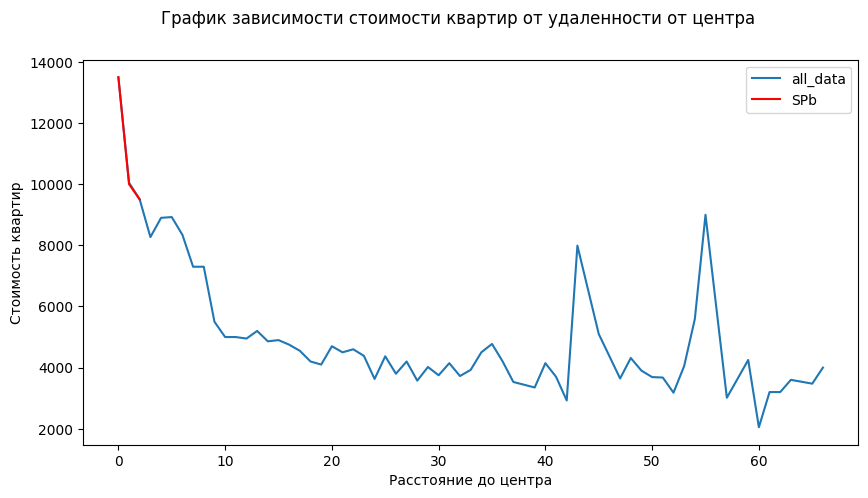

In [964]:
#Создадим столбец сityCenters_nearest_km, отражающий расстояние до центра города в км, для таблицы data
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(0)
#display(data.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'median').tail(25))


plt.subplots(1,1, figsize= (10,5))
ax1 = data.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'median')
plt.plot(ax1.index, ax1.values, label = 'all_data' )

ax2 = spb_flats.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'median')
plt.plot(ax2.index, ax2.values , color='Red', label ='SPb')


plt.suptitle('График зависимости стоимости квартир от удаленности от центра')
plt.xlabel('Расстояние до центра')
plt.ylabel('Стоимость квартир')
plt.legend()
plt.show()

**Примечание**: сильные выбросы на 43, 45, 54, 55 км. Скорее всего там находятся по одной квартире на таком расстоянии

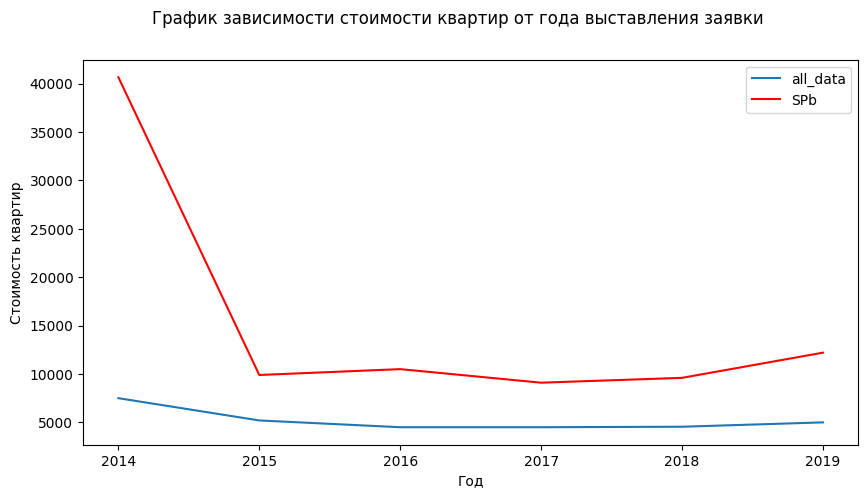

In [965]:
plt.subplots(1,1, figsize= (10,5))
ax1 = data.pivot_table(index = 'year', values = 'last_price', aggfunc = 'median')
plt.plot(ax1.index, ax1.values, label = 'all_data' )

ax2 = spb_flats.pivot_table(index = 'year', values = 'last_price', aggfunc = 'median')
plt.plot(ax2.index, ax2.values , color='Red', label ='SPb')


plt.suptitle('График зависимости стоимости квартир от года выставления заявки')
plt.xlabel('Год')
plt.ylabel('Стоимость квартир')
plt.legend()
plt.show()

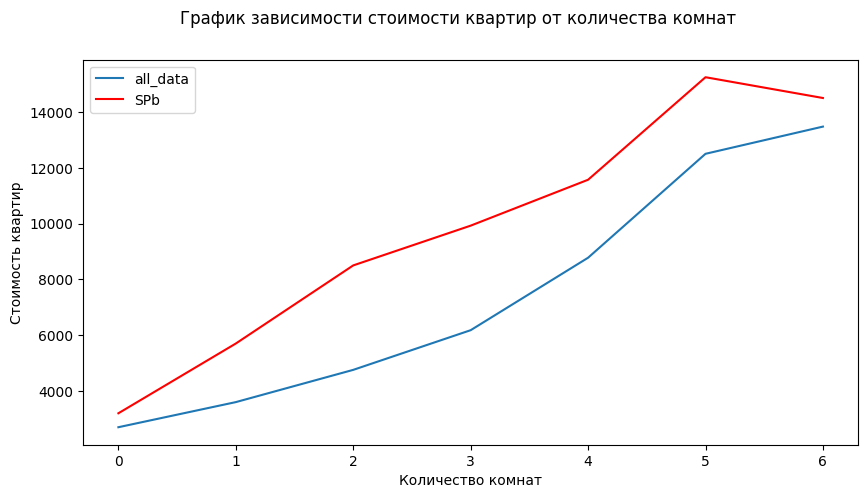

In [966]:
plt.subplots(1,1, figsize= (10,5))
ax1 = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median')
plt.plot(ax1.index, ax1.values, label = 'all_data' )

ax2 = spb_flats.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median')
plt.plot(ax2.index, ax2.values , color='Red', label ='SPb')


plt.suptitle('График зависимости стоимости квартир от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость квартир')
plt.legend()
plt.show()

Как видно из графиков, что и логично, медианная цена квартир в СПб значительно выше, чем медианная цена по всему датасету.

В целом, распределение по этажам, по количеству комнат и по году выставления заявки (после 2015) похожее



## Общий вывод

Предложенный датасет имел большое количество пропусков, при заполнении которых применялись методы категоризации, группировки и исследование столбцов на выбросы.

Также в таблицу добавлены значения цены квадратного метра (**price_per_area**); дня (**weekday**), месяца(**month**), года (**year**) публикации объвления; категории этажа (первый, другой или последний) **what_the_floor**, а также отношения жилой площади к общей (**living_rate**) и кухонной площади к общей (**kitchen_rate**).

Основное исследование показало:

- Основное множесто квартир имеют площадь в диапазоне ~ 30..60 кв м. Самое большое количество квартир (>5000) - ~ 30..40 кв м, немного меньше (~ 4500) - 40..50 кв м.

- Самая частая цена на рынке жилья ~ 2,5..5 млн р. В этом диапазоне лежит ~ 10000 вариантов

- Преимущественно представлены 1 -комнатные и 2-комнатные (~ 8000) и 3-комнатные (~ 6000) квартиры. 

- 2,65 м - наиболее встречющаяся высота потолков. 

- Среднестатистически квартира продается от 44..218 дней.

Сильная корреляция цены квартиры с ее площадью, с удаленностью от центра города имеется обратная зависимость. 
Стоимость квартиры также напрямую зависит от количества комнат.

~Четкую зависимость стоимости квартир от количества в них комнат сложно уследить: по одной стоимости можно было купить как 1-шку, так и квартиру с большим количеством комнат. Кроме того, самые дорогие квартиры вовсе не имеют максимальное количество комнат (судя по графикам, 3-шки имеют самые высокие цены).~

С приближением к центру, растет стоимость квратир в предложениях. На это указывают отрицательное значение коээфициента Пирсона и график распределения. Основная масса квартир расположена в 10-20 км.

Цена на квартиры на первом и последних этажах не самая высокая

В зависимости от даты выставления объявления :

- в целом для большинства квартир для каждого дня значения цены варьируются в одном ценовом диапазоне (значение прозрачности очень маленькая). Больше всего выделяются цены квартир, объявления которых выставлены в среду или четверг. В выходные дни количество объявлений почти в два раз меньше, чем в будние дни.

- в зависимости от месяца объявления, большое количество дорогих квартир выставлено в июне и августе. Большое количество объявлений было выставлено в апреле, марте, ноябре и феврале (>2000).

- В среднем стоимость квартир в 2014 году была максимальной (при этом наблюдалось очень маленькое количество предложений). Рассеяние значение стоимости квартир - максимально (стандартное отклонение). Основной бум предложений произошел в 2017 и 2018 годах. Два года подряд - в 2016 и в 2017 наблюдался активный рост количества объявлений (~ в 3 раза).С ростом предложений уменьшалась дисперсия относитлеьно медианной цены. В 2019 наблюдалось снижение количества предложений и вместе с ними, снижалось количество квартир, однако дисперсия цен не изменилась. Согласно графику, с 2014 по 2016 наблюдается снижение медианной цены квартир, после наблюдается восходщий тренд

Были найдены 10 городов с большим количеством объявлений Санкт-Петербургб посёлок Мурино, посёлок Шушары, Всеволожск,
Пушкин, Колпино,посёлок Парголово,Гатчина, деревня Кудрово, Выборг. Среди них:

- Город с высокой стоимостью квадратного метра квартиры: Санкт-Петербург с ценой за квадратный метр 109.71
- Город с низкой стоимостью квадратного метра квартиры: Выборг с ценой за квадратный метр 58.012

Анлизируя изменение медианной цены от расстояния до центра было установлено, что достаточно сильное изменение в цене происходит на расстоянии 3 км от центра города. Таким образом были установлены границы центра. В центре:

- в центре города квартиры просторные, их площадь варьируется 50..100 кв м(против 30..60 кв м по всему датасету)

- максимум цены смещен вправо, так как стоимость квартиры в СПб (особенно в центре) выше средней цены по датасету (в центре города средняя стоимость сильно выше и варьируется 7,5..11 млн руб)

- в центральной части Санкт-Петербурга преимущественно выставлялись предложения по 2-х, 3-х и 4-х комнатным квартирам.

- в центре города большая доля квартир, имеющие потолки выше стандартных 2,7 м

- медианная цена квартир в СПб значительно выше, чем медианная цена по всему датасету. При этом распределение цен в зависимости от факторов (в зависимости от этажа, удаленности от центра и года выставления заявки) похожее.